In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.zip to Dataset.zip


In [ ]:
import zipfile
import os

In [ ]:
# Pastikan nama sesuai hasil upload
zip_path = "/content/Dataset.zip"

In [ ]:
# Ekstrak ke folder dataset/
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

In [ ]:
# Cek struktur folder
for root, dirs, files in os.walk("/content/dataset"):
    level = root.replace("/content/dataset", "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files[:5]:  # tampilkan max 5 file per folder
        print(f"{subindent}{f}")

dataset/
    Dataset/
        Mentah/
            mentah8.jpg
            mentah1.jpg
            mentah3.jpg
            mentah7.jpg
            mentah4.jpg
        Setengah Matang/
            masak3.jpg
            Masak.jpg
            masak4.jpg
            masak9.jpg
            masak6.jpg
        Matang/
            matang9.jpg
            matang8.jpg
            matang4.jpg
            matang5.jpg
            matang6.jpg


In [ ]:
# STEP 2: Setup dan Image Generator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Training Model CNN dan Konversi ke .tflite

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_height, img_width = 150, 150
batch_size = 16

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% untuk validasi
)

In [ ]:
train_data = datagen.flow_from_directory(
    "/content/dataset/Dataset",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 24 images belonging to 3 classes.


In [ ]:
val_data = datagen.flow_from_directory(
    "/content/dataset/Dataset",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 6 images belonging to 3 classes.


Bangun Model CNN Sederhana

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 kelas
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,308,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,328,067 (20.32 MB)

 Trainable params: 5,328,067 (20.32 MB)

 Non-trainable params: 0 (0.00 B)

Training Model

In [ ]:
model.fit(train_data, validation_data=val_data, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.2222 - loss: 2.1535 - val_accuracy: 0.3333 - val_loss: 2.9479
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4444 - loss: 2.2035 - val_accuracy: 0.3333 - val_loss: 1.9681
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3611 - loss: 1.7110 - val_accuracy: 0.3333 - val_loss: 1.0334
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 902ms/step - accuracy: 0.7708 - loss: 0.7666 - val_accuracy: 0.5000 - val_loss: 1.0410
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 920ms/step - accuracy: 0.6458 - loss: 0.7129 - val_accuracy: 0.6667 - val_loss: 0.9396
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 920ms/step - accuracy: 0.9028 - loss: 0.5696 - val_accuracy: 0.5000 - val_loss: 0.9189
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 909ms/step - accuracy: 0.9028 - loss: 0.4905 - val_accuracy: 0.5000 - val_loss: 0.9082
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 904ms/step - accuracy: 0.9722 - loss: 0.3556 - val_accuracy: 0.5000 - val_loss: 0.9594
E

Klasifikasi Gambar & Tampilkan dengan matplotlib

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


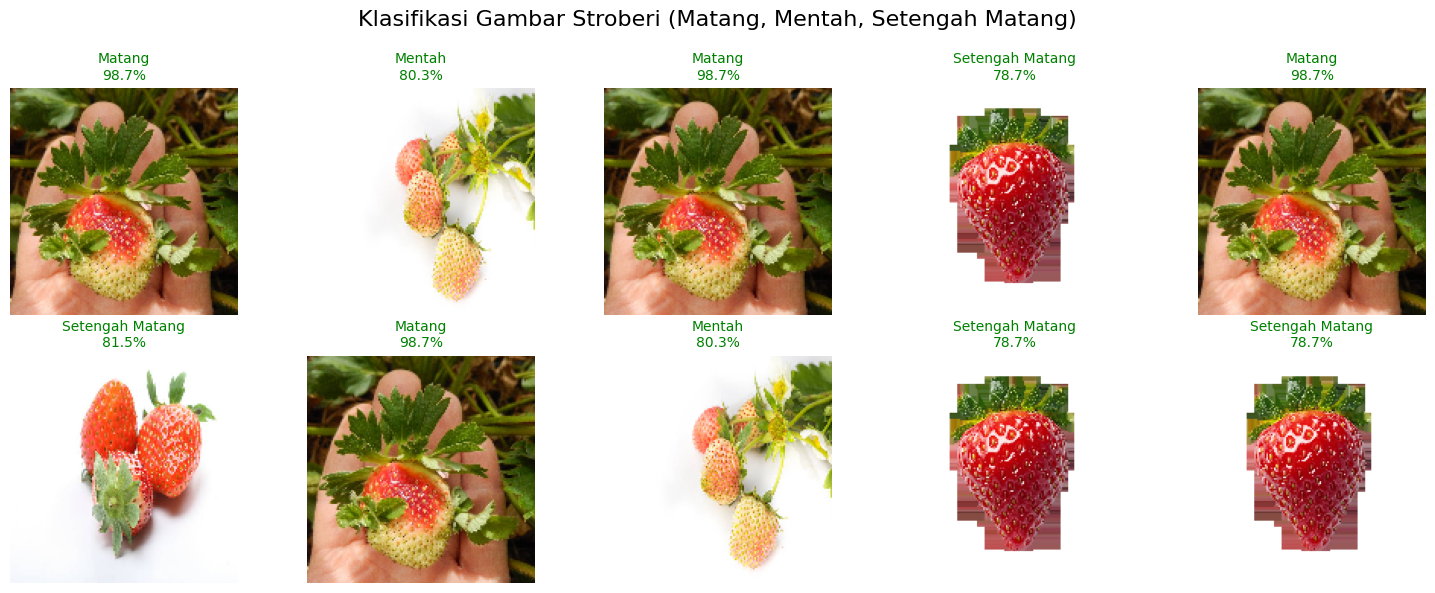

In [ ]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Ambil filepaths dari 3 kelas yang diizinkan
selected_classes = ['Matang', 'Mentah', 'Setengah Matang']
filtered_paths = [path for path in val_data.filepaths if any(cls in path for cls in selected_classes)]

# Ambil 10 gambar dengan confidence tinggi dari kelas yang valid
valid_samples = []
while len(valid_samples) < 10:
    img_path = random.choice(filtered_paths)

    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    predicted_idx = np.argmax(prediction)
    confidence = prediction[predicted_idx]

    # Hanya ambil jika label hasil prediksi termasuk 3 kelas & confidence cukup
    predicted_label = labels[predicted_idx]
    if predicted_label in selected_classes and confidence >= 0.75:
        valid_samples.append((img, predicted_label, confidence))

# Tampilkan dalam grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Klasifikasi Gambar Stroberi (Matang, Mentah, Setengah Matang)', fontsize=16)

for i, (img, label, conf) in enumerate(valid_samples):
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"{label}\n{conf*100:.1f}%", color='green', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


Simpan dan Konversi ke .tflite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpi7gq3l2n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135387549283728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135387549284880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135387549285264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135387549284304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135387549283920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135387549285456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135387549281616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135387549285072: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
with open("StrawberryModel.tflite", "wb") as f:
    f.write(tflite_model)

In [ ]:
from google.colab import files
files.download("StrawberryModel.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>